# Show a prompt

Given a base folder, a list of prompts, and a slice number, show the prompt on the slice. The purpose of this notebook is double: first, show how to use a prompt from a file containing a list; second, test if the prompt storage process is correct.

Here are all the notebook dependencies:

In [1]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from sam_prompt import SAMPrompt

These are the parameters to be used in the notebook:

In [2]:
BaseFolderPath = Path('..')  # Base folder, relative to this notebook.
SAMPromptListPath = BaseFolderPath / Path(
    'working_data/covid/results/image_coronacases_001/'
    'sam_prompts_2024-03-11_17-51-59.json')  # Path to the prompts JSON file.
SliceNumber = 60  # Slice number to be shown.
PointLabelPositiveColor = '#90ee90'  # Color for positive point prompts.
PointLabelNegativeColor = 'red'  # Color for negative point prompts.
BoundingBoxColor = 'orange'  # Color for the bounding box.

Load the JSON file containing the prompts.

In [3]:
with open(SAMPromptListPath, 'r') as input_file:
    sam_prompts = json.load(input_file)

Load the prompt for the given slice number.

In [4]:
sam_prompt = next((sam_prompt for sam_prompt in sam_prompts if sam_prompt[SAMPrompt.SliceNumberKey] == SliceNumber),
                  None)

Load the slice.

In [5]:
image_npz = np.load(BaseFolderPath / Path(sam_prompt[SAMPrompt.ImageFilePathKey]))
image_npz_keys = list(image_npz.keys())
image = image_npz[image_npz_keys[0]]
image_slice = image[..., SliceNumber]

Show the slice with the different prompts.

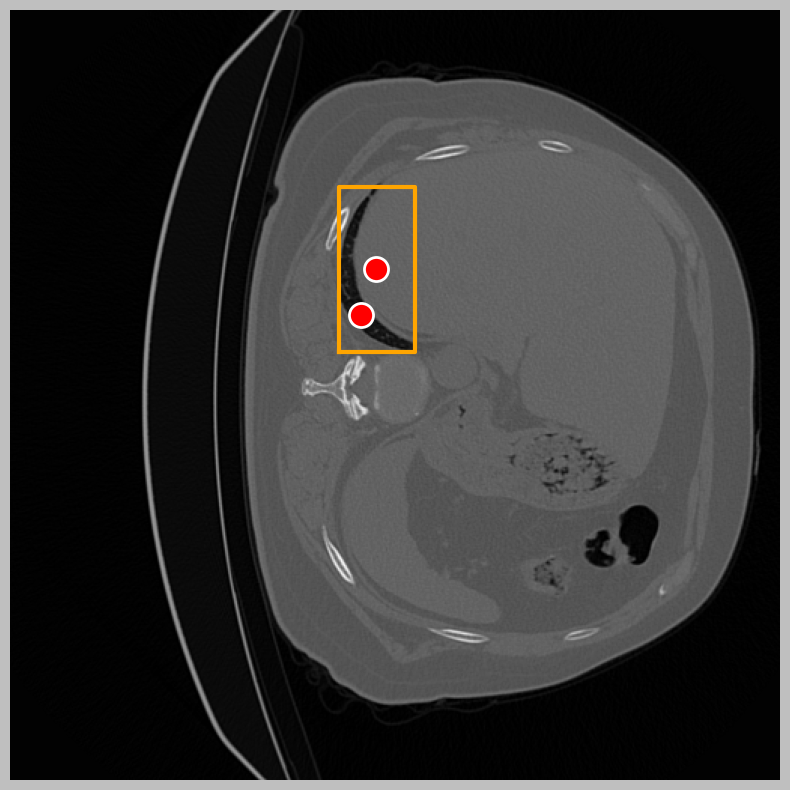

In [8]:
# Show the slice. Notice how the slice is transposed to match the image orientation (rows, columns vs. x, y).
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.style.use('grayscale')
plt.imshow(image_slice.T)

# Show the point prompts in the corresponding colors.
for point_coords in sam_prompt[SAMPrompt.PromptKey][SAMPrompt.PointsCoordsKey]:
    row = point_coords[SAMPrompt.PointCoordsRowKey]
    column = point_coords[SAMPrompt.PointCoordsColumnKey]
    label = point_coords[SAMPrompt.PointCoordsLabelKey]

    if label == SAMPrompt.PointLabelPositive:
        color = PointLabelPositiveColor
    else:
        color = PointLabelNegativeColor

    plt.scatter(column, row, color=color, marker='o', s=300, edgecolor='white',
                linewidth=2)

bounding_box = sam_prompt[SAMPrompt.PromptKey][SAMPrompt.BoundingBoxKey]
rows = [bounding_box[SAMPrompt.BoundingBoxLowerRightCornerKey][SAMPrompt.PointCoordsRowKey],
        bounding_box[SAMPrompt.BoundingBoxLowerRightCornerKey][SAMPrompt.PointCoordsRowKey],
        bounding_box[SAMPrompt.BoundingBoxUpperLeftCornerKey][SAMPrompt.PointCoordsRowKey],
        bounding_box[SAMPrompt.BoundingBoxUpperLeftCornerKey][SAMPrompt.PointCoordsRowKey],
        bounding_box[SAMPrompt.BoundingBoxLowerRightCornerKey][SAMPrompt.PointCoordsRowKey]]
columns = [bounding_box[SAMPrompt.BoundingBoxUpperLeftCornerKey][SAMPrompt.PointCoordsColumnKey],
           bounding_box[SAMPrompt.BoundingBoxLowerRightCornerKey][SAMPrompt.PointCoordsColumnKey],
           bounding_box[SAMPrompt.BoundingBoxLowerRightCornerKey][SAMPrompt.PointCoordsColumnKey],
           bounding_box[SAMPrompt.BoundingBoxUpperLeftCornerKey][SAMPrompt.PointCoordsColumnKey],
           bounding_box[SAMPrompt.BoundingBoxUpperLeftCornerKey][SAMPrompt.PointCoordsColumnKey]]
plt.plot(columns, rows, color=BoundingBoxColor, linewidth=3)
plt.show()